Problem 3: Google Playstore Apps Dataset (63 points)

Load Libraries

In [93]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

Load Dataset

In [94]:
df = pd.read_excel('GooglePlaystore.xlsx')
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres         Last Updated  \
0           Everyone               Art & Design  2018-01-07 00:00:00   
1           Everyone  Art & Design;Pretend Play  2018-01-15 00:00:00   
2           Everyone               Art & Design  2018-08-01 00:00:00   
3               Teen               Art & Design  2018-06-08 00:00:00   
4           Everyone    Art & Design;Creativity  2018-06-20 00:00:00   
...              ...                        ...                  ...   
10836       Everyone                  Education  2017-07-25 00:00:00   
10837       Everyone                  Education  2018-07-06 00:00:00   
10838       Everyone                    Medical  2017-01-20 00:00:00   
10839     Mature 17+          Books & Reference  2015-01-19 00:00:00   
10840       Everyone                  Lifestyle  2018-07-25 00:00:00   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                   1          4.1 and up  
10838                   1          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

Preprocessing (28 pts)

1.[3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [95]:
df = df[df['Reviews'] != "3.0M"]
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres         Last Updated  \
0           Everyone               Art & Design  2018-01-07 00:00:00   
1           Everyone  Art & Design;Pretend Play  2018-01-15 00:00:00   
2           Everyone               Art & Design  2018-08-01 00:00:00   
3               Teen               Art & Design  2018-06-08 00:00:00   
4           Everyone    Art & Design;Creativity  2018-06-20 00:00:00   
...              ...                        ...                  ...   
10836       Everyone                  Education  2017-07-25 00:00:00   
10837       Everyone                  Education  2018-07-06 00:00:00   
10838       Everyone                    Medical  2017-01-20 00:00:00   
10839     Mature 17+          Books & Reference  2015-01-19 00:00:00   
10840       Everyone                  Lifestyle  2018-07-25 00:00:00   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                   1          4.1 and up  
10838                   1          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10840 rows x 13 columns]

2.[4 pts] Remove rows where any of the columns has the value "Varies with device".

In [96]:
df = df[~df.isin(["Varies with device"]).any(axis=1)]
df

App        Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                    Coloring book moana  ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
5                             Paper flowers instructions  ART_AND_DESIGN   
...                                                  ...             ...   
10834                                      FR Calculator          FAMILY   
10835                                           FR Forms        BUSINESS   
10836                                   Sya9a Maroc - FR          FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings          FAMILY   
10838                             Parkinson Exercices FR         MEDICAL   

       Rating Reviews  Size    Installs  Type Price Content Rating  \
0         4.1     159   19M     10,000+  Free     0       Everyone   
1         3.9     967   14M    500,000+  Free     0       Everyone   
2         4.7   87510  8.7M  5,000,000+  Free     0       Everyone   
4         4.3     967  2.8M    100,000+  Free     0       Everyone   
5         4.4     167  5.6M     50,000+  Free     0       Everyone   
...       ...     ...   ...         ...   ...   ...            ...   
10834     4.0       7  2.6M        500+  Free     0       Everyone   
10835     NaN       0  9.6M         10+  Free     0       Everyone   
10836     4.5      38   53M      5,000+  Free     0       Everyone   
10837     5.0       4  3.6M        100+  Free     0       Everyone   
10838     NaN       3  9.5M      1,000+  Free     0       Everyone   

                          Genres         Last Updated Current Ver  \
0                   Art & Design  2018-01-07 00:00:00       1.0.0   
1      Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0   
2                   Art & Design  2018-08-01 00:00:00       1.2.4   
4        Art & Design;Creativity  2018-06-20 00:00:00         1.1   
5                   Art & Design  2017-03-26 00:00:00           1   
...                          ...                  ...         ...   
10834                  Education  2017-06-18 00:00:00       1.0.0   
10835                   Business  2016-09-29 00:00:00       1.1.5   
10836                  Education  2017-07-25 00:00:00        1.48   
10837                  Education  2018-07-06 00:00:00           1   
10838                    Medical  2017-01-20 00:00:00           1   

        Android Ver  
0      4.0.3 and up  
1      4.0.3 and up  
2      4.0.3 and up  
4        4.4 and up  
5        2.3 and up  
...             ...  
10834    4.1 and up  
10835    4.0 and up  
10836    4.1 and up  
10837    4.1 and up  
10838    2.2 and up  

[9059 rows x 13 columns]

3.[5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".
If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [97]:
def clean_android_version(val):
    if isinstance(val, str):
        val = val.split(' ')[0]  # Remove "and up"
        val = val.split('-')[0]  # Keep first range value
        parts = val.split('.')[:2]
        return '.'.join(parts)
    return np.nan
# Make a copy to avoid chained assignment issues
df = df.copy()

# Clean the 'Android Ver' column safely
df.loc[:, 'Android Ver'] = df['Android Ver'].apply(clean_android_version)
df

App        Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                    Coloring book moana  ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
5                             Paper flowers instructions  ART_AND_DESIGN   
...                                                  ...             ...   
10834                                      FR Calculator          FAMILY   
10835                                           FR Forms        BUSINESS   
10836                                   Sya9a Maroc - FR          FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings          FAMILY   
10838                             Parkinson Exercices FR         MEDICAL   

       Rating Reviews  Size    Installs  Type Price Content Rating  \
0         4.1     159   19M     10,000+  Free     0       Everyone   
1         3.9     967   14M    500,000+  Free     0       Everyone   
2         4.7   87510  8.7M  5,000,000+  Free     0       Everyone   
4         4.3     967  2.8M    100,000+  Free     0       Everyone   
5         4.4     167  5.6M     50,000+  Free     0       Everyone   
...       ...     ...   ...         ...   ...   ...            ...   
10834     4.0       7  2.6M        500+  Free     0       Everyone   
10835     NaN       0  9.6M         10+  Free     0       Everyone   
10836     4.5      38   53M      5,000+  Free     0       Everyone   
10837     5.0       4  3.6M        100+  Free     0       Everyone   
10838     NaN       3  9.5M      1,000+  Free     0       Everyone   

                          Genres         Last Updated Current Ver Android Ver  
0                   Art & Design  2018-01-07 00:00:00       1.0.0         4.0  
1      Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0         4.0  
2                   Art & Design  2018-08-01 00:00:00       1.2.4         4.0  
4        Art & Design;Creativity  2018-06-20 00:00:00         1.1         4.4  
5                   Art & Design  2017-03-26 00:00:00           1         2.3  
...                          ...                  ...         ...         ...  
10834                  Education  2017-06-18 00:00:00       1.0.0         4.1  
10835                   Business  2016-09-29 00:00:00       1.1.5         4.0  
10836                  Education  2017-07-25 00:00:00        1.48         4.1  
10837                  Education  2018-07-06 00:00:00           1         4.1  
10838                    Medical  2017-01-20 00:00:00           1         2.2  

[9059 rows x 13 columns]

4.[5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [98]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(int)
df

App        Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                    Coloring book moana  ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
5                             Paper flowers instructions  ART_AND_DESIGN   
...                                                  ...             ...   
10834                                      FR Calculator          FAMILY   
10835                                           FR Forms        BUSINESS   
10836                                   Sya9a Maroc - FR          FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings          FAMILY   
10838                             Parkinson Exercices FR         MEDICAL   

       Rating Reviews  Size  Installs  Type Price Content Rating  \
0         4.1     159   19M     10000  Free     0       Everyone   
1         3.9     967   14M    500000  Free     0       Everyone   
2         4.7   87510  8.7M   5000000  Free     0       Everyone   
4         4.3     967  2.8M    100000  Free     0       Everyone   
5         4.4     167  5.6M     50000  Free     0       Everyone   
...       ...     ...   ...       ...   ...   ...            ...   
10834     4.0       7  2.6M       500  Free     0       Everyone   
10835     NaN       0  9.6M        10  Free     0       Everyone   
10836     4.5      38   53M      5000  Free     0       Everyone   
10837     5.0       4  3.6M       100  Free     0       Everyone   
10838     NaN       3  9.5M      1000  Free     0       Everyone   

                          Genres         Last Updated Current Ver Android Ver  
0                   Art & Design  2018-01-07 00:00:00       1.0.0         4.0  
1      Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0         4.0  
2                   Art & Design  2018-08-01 00:00:00       1.2.4         4.0  
4        Art & Design;Creativity  2018-06-20 00:00:00         1.1         4.4  
5                   Art & Design  2017-03-26 00:00:00           1         2.3  
...                          ...                  ...         ...         ...  
10834                  Education  2017-06-18 00:00:00       1.0.0         4.1  
10835                   Business  2016-09-29 00:00:00       1.1.5         4.0  
10836                  Education  2017-07-25 00:00:00        1.48         4.1  
10837                  Education  2018-07-06 00:00:00           1         4.1  
10838                    Medical  2017-01-20 00:00:00           1         2.2  

[9059 rows x 13 columns]

5.[5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [99]:
category_avg = df.groupby('Category')['Rating'].mean().to_dict()
def fill_rating(row):
    if pd.isna(row['Rating']):
        if row['Reviews'] < 100 and row['Installs'] < 50000:
            return np.nan
        return round(category_avg.get(row['Category'], df['Rating'].mean()), 2)
    return row['Rating']
df['Rating'] = df.apply(fill_rating, axis=1)
df = df.dropna(subset=['Rating'])
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10832                                           FR Tides              WEATHER   
10833                                        Chemin (fr)  BOOKS_AND_REFERENCE   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   

       Rating Reviews  Size  Installs  Type Price Content Rating  \
0         4.1     159   19M     10000  Free     0       Everyone   
1         3.9     967   14M    500000  Free     0       Everyone   
2         4.7   87510  8.7M   5000000  Free     0       Everyone   
4         4.3     967  2.8M    100000  Free     0       Everyone   
5         4.4     167  5.6M     50000  Free     0       Everyone   
...       ...     ...   ...       ...   ...   ...            ...   
10832     3.8    1195  582k    100000  Free     0       Everyone   
10833     4.8      44  619k      1000  Free     0       Everyone   
10834     4.0       7  2.6M       500  Free     0       Everyone   
10836     4.5      38   53M      5000  Free     0       Everyone   
10837     5.0       4  3.6M       100  Free     0       Everyone   

                          Genres         Last Updated Current Ver Android Ver  
0                   Art & Design  2018-01-07 00:00:00       1.0.0         4.0  
1      Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0         4.0  
2                   Art & Design  2018-08-01 00:00:00       1.2.4         4.0  
4        Art & Design;Creativity  2018-06-20 00:00:00         1.1         4.4  
5                   Art & Design  2017-03-26 00:00:00           1         2.3  
...                          ...                  ...         ...         ...  
10832                    Weather  2014-02-16 00:00:00           6         2.1  
10833          Books & Reference  2014-03-23 00:00:00         0.8         2.2  
10834                  Education  2017-06-18 00:00:00       1.0.0         4.1  
10836                  Education  2017-07-25 00:00:00        1.48         4.1  
10837                  Education  2018-07-06 00:00:00           1         4.1  

[7685 rows x 13 columns]

6.[6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [100]:
# Define the size cleaning function
def clean_size(value):
    if isinstance(value, str):
        value = value.strip()
        if value.lower().endswith('m'):
            return int(float(value[:-1]) * 1_000_000)  # Convert M to millions
        elif value.lower().endswith('k'):
            return int(float(value[:-1]) * 1_000)      # Convert K to thousands
        else:
            return None  # Handle 'Varies with device' or unexpected strings
    elif isinstance(value, (int, float)):
        return int(value)  # Already numeric, ensure it's int
    else:
        return None  # Handle NaN or other types

# Make sure we're working with a fresh copy to avoid SettingWithCopyWarning
df = df.copy()

# Apply the cleaning function to the Size column using .loc
df.loc[:, 'Size'] = df['Size'].apply(clean_size)
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10832                                           FR Tides              WEATHER   
10833                                        Chemin (fr)  BOOKS_AND_REFERENCE   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   

       Rating Reviews      Size  Installs  Type Price Content Rating  \
0         4.1     159  19000000     10000  Free     0       Everyone   
1         3.9     967  14000000    500000  Free     0       Everyone   
2         4.7   87510   8700000   5000000  Free     0       Everyone   
4         4.3     967   2800000    100000  Free     0       Everyone   
5         4.4     167   5600000     50000  Free     0       Everyone   
...       ...     ...       ...       ...   ...   ...            ...   
10832     3.8    1195    582000    100000  Free     0       Everyone   
10833     4.8      44    619000      1000  Free     0       Everyone   
10834     4.0       7   2600000       500  Free     0       Everyone   
10836     4.5      38  53000000      5000  Free     0       Everyone   
10837     5.0       4   3600000       100  Free     0       Everyone   

                          Genres         Last Updated Current Ver Android Ver  
0                   Art & Design  2018-01-07 00:00:00       1.0.0         4.0  
1      Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0         4.0  
2                   Art & Design  2018-08-01 00:00:00       1.2.4         4.0  
4        Art & Design;Creativity  2018-06-20 00:00:00         1.1         4.4  
5                   Art & Design  2017-03-26 00:00:00           1         2.3  
...                          ...                  ...         ...         ...  
10832                    Weather  2014-02-16 00:00:00           6         2.1  
10833          Books & Reference  2014-03-23 00:00:00         0.8         2.2  
10834                  Education  2017-06-18 00:00:00       1.0.0         4.1  
10836                  Education  2017-07-25 00:00:00        1.48         4.1  
10837                  Education  2018-07-06 00:00:00           1         4.1  

[7685 rows x 13 columns]

1[4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [101]:
df.groupby('Category')['Rating'].describe()

count      mean       std  min    25%   50%    75%  max
Category                                                                     
ART_AND_DESIGN         59.0  4.358644  0.365322  3.2  4.100  4.40  4.700  5.0
AUTO_AND_VEHICLES      62.0  4.146774  0.569935  2.1  3.900  4.25  4.500  4.9
BEAUTY                 40.0  4.291750  0.356175  3.1  4.075  4.30  4.525  4.9
BOOKS_AND_REFERENCE   147.0  4.320136  0.453084  2.7  4.100  4.40  4.600  5.0
BUSINESS              246.0  4.119187  0.662586  1.0  3.825  4.30  4.500  5.0
COMICS                 49.0  4.154082  0.550363  2.8  3.800  4.40  4.600  5.0
COMMUNICATION         210.0  4.100952  0.502624  1.0  3.900  4.20  4.400  5.0
DATING                174.0  3.957816  0.664204  1.0  3.600  4.10  4.400  5.0
EDUCATION             110.0  4.392636  0.254395  3.5  4.300  4.40  4.600  4.9
ENTERTAINMENT          86.0  4.145349  0.291308  3.0  4.000  4.20  4.300  4.7
EVENTS                 36.0  4.474167  0.340037  3.7  4.300  4.50  4.725  5.0
FAMILY               1611.0  4.189609  0.514460  1.0  4.000  4.30  4.500  5.0
FINANCE               263.0  4.114068  0.683553  1.0  3.900  4.30  4.500  5.0
FOOD_AND_DRINK         86.0  4.097674  0.573529  1.7  3.800  4.20  4.500  5.0
GAME                  956.0  4.268588  0.378420  1.0  4.100  4.30  4.500  5.0
HEALTH_AND_FITNESS    220.0  4.215455  0.696722  1.4  4.000  4.50  4.600  5.0
HOUSE_AND_HOME         58.0  4.162414  0.376299  2.8  4.000  4.20  4.475  4.8
LIBRARIES_AND_DEMO     68.0  4.202941  0.350254  3.1  4.000  4.20  4.400  5.0
LIFESTYLE             280.0  4.093143  0.714612  1.5  3.800  4.20  4.600  5.0
MAPS_AND_NAVIGATION    94.0  4.004255  0.556663  1.9  3.700  4.20  4.400  4.9
MEDICAL               321.0  4.180374  0.676356  1.0  3.900  4.30  4.600  5.0
NEWS_AND_MAGAZINES    171.0  4.141637  0.586858  1.7  3.950  4.30  4.500  5.0
PARENTING              48.0  4.347917  0.397058  3.1  4.100  4.40  4.625  5.0
PERSONALIZATION       277.0  4.322022  0.368190  2.5  4.100  4.40  4.600  5.0
PHOTOGRAPHY           234.0  4.145726  0.512675  2.0  4.000  4.30  4.500  5.0
PRODUCTIVITY          232.0  4.140690  0.581525  1.0  4.000  4.20  4.500  5.0
SHOPPING              178.0  4.226404  0.439606  1.6  4.100  4.30  4.500  5.0
SOCIAL                170.0  4.257059  0.484289  1.9  4.100  4.30  4.600  5.0
SPORTS                248.0  4.204839  0.466767  1.5  4.000  4.30  4.500  5.0
TOOLS                 633.0  4.010616  0.638232  1.0  3.800  4.20  4.400  5.0
TRAVEL_AND_LOCAL      155.0  4.029677  0.556680  2.2  3.700  4.20  4.400  5.0
VIDEO_PLAYERS         114.0  4.029211  0.593726  1.8  3.725  4.20  4.400  4.9
WEATHER                49.0  4.242857  0.349404  3.3  4.000  4.30  4.500  4.8

2.[11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:
A.Rating (gives top 3 most highly rated applications in each category)
B.Installs (gives top 3 most installed applications in each category)
C.Reviews (gives top 3 most reviewed applications in each category)
You don't need to do anything explicit to break ties.

Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column, as for instance:

In [102]:
# Step 1: Extract only Free apps
free_df = df[df['Type'] == 'Free'].copy()

# Step 2: Define the function
def top3_free_by_column(df, column_name):
    # Sort by Category and column in descending order
    sorted_df = df.sort_values(by=['Category', column_name], ascending=[True, False])
    
    # Group by Category and take top 3
    top3 = sorted_df.groupby('Category').head(3)
    
    # Return only required columns
    return top3[['Category', 'App', column_name]]

# Step 3: Call function for Rating, Installs, and Reviews
top3_rating = top3_free_by_column(free_df, 'Rating')
top3_installs = top3_free_by_column(free_df, 'Installs')
top3_reviews = top3_free_by_column(free_df, 'Reviews')


print("Top 3 Free Apps by Rating (per Category):")
top3_rating = top3_free_by_column(free_df, 'Rating')
print(top3_rating, "\n")

print("Top 3 Free Apps by Installs (per Category):")
top3_installs = top3_free_by_column(free_df, 'Installs')
print(top3_installs, "\n")

print("Top 3 Free Apps by Reviews (per Category):")
top3_reviews = top3_free_by_column(free_df, 'Reviews')
print(top3_reviews)



Top 3 Free Apps by Rating (per Category):
               Category                                                App  \
8888     ART_AND_DESIGN            Spring flowers theme couleurs d t space   
25       ART_AND_DESIGN                         Harley Quinn wallpapers HD   
3982     ART_AND_DESIGN                                  Cardi B Wallpaper   
55    AUTO_AND_VEHICLES  Tickets SDA 2018 and Exam from the State Traff...   
61    AUTO_AND_VEHICLES                     CDL Practice Test 2018 Edition   
...                 ...                                                ...   
4038      VIDEO_PLAYERS  DU Recorder – Screen Recorder, Video Editor, Live   
5244      VIDEO_PLAYERS                                          AJ Player   
3627            WEATHER                                   Weather forecast   
3629            WEATHER                                   Live Weather Pro   
3631            WEATHER                         weather - weather forecast   

      Rating  
8888  

3.[4 pts] Find the average, maximum and minimum price of the paid applications.

In [103]:
# Filter Paid apps
paid_apps = df[df['Type'] == 'Paid'].copy()

# Clean and convert Price column
paid_apps['Price'] = paid_apps['Price'].astype(str).str.replace('$', '').astype(float)

# Calculate statistics
avg_price = paid_apps['Price'].mean()
max_price = paid_apps['Price'].max()
min_price = paid_apps['Price'].min()

print("Average Price:", avg_price)
print("Maximum Price:", max_price)
print("Minimum Price:", min_price)


Average Price: 15.139163763066204
Maximum Price: 400.0
Minimum Price: 0.99


Visualization (16 pts)

1.[9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
Count the number of applications per genre and display it using a pie chart.
Hint: Read about DataFrame.explode()

In [ ]:
df['Genres'] = df['Genres'].str.split(';')
df = df.explode('Genres')
(df['Genres'].value_counts()).plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Genres")
plt.tight_layout()
plt.show()

2.[7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

Text(0, 0.5, 'Rating')

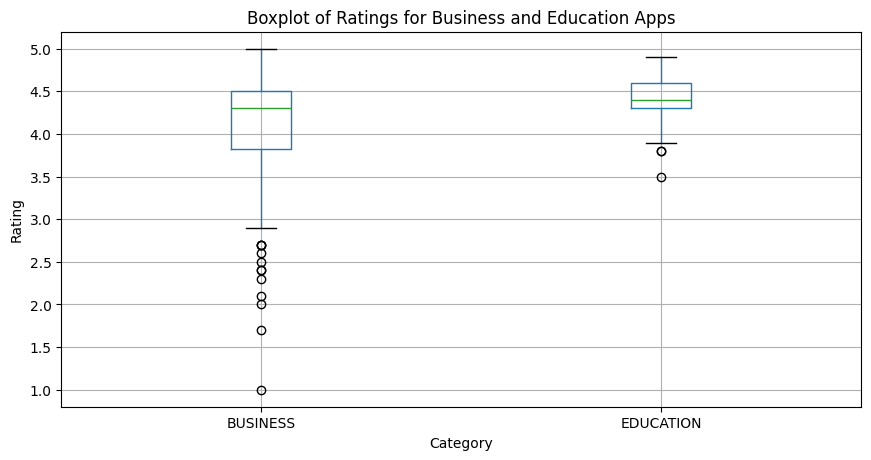

In [105]:
filter = df.loc[(df['Category'] == 'BUSINESS')|(df['Category'] == 'EDUCATION')]
filter.boxplot(column = 'Rating', by = 'Category', fontsize = 'medium', rot = 0, grid = True, figsize = (10,5))
plt.title("Boxplot of Ratings for Business and Education Apps")
plt.suptitle("")  # remove automatic title
plt.xlabel("Category")
plt.ylabel("Rating")